This is Ipython Notebook four of five for my final project in General Assembly's data science course.

The following code contains contains the data visualizations.

In practice, the data cleaning and visualization models were created in parallel. I have separated them for ease of reproducability.

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Load cleaned data exported from Data Cleaning Ipython Notebook

data = pd.read_csv(r'C:\Users\alsherman\Desktop\GitHub\DataScience_GeneralAssembly\Data\Cleaned_Data_Final.csv')

In [3]:
data.describe()

,ID,country,latitude,location_data_accuracy,longitude,availability,average_image_size,bathroom,bedroom,cat,...,price,smoking,square_footage,grocery_list,gym_list,square_footage_cleaned,weekday_of_posting,Posting_Time_AM_or_PM,Posting_Time,Posting_Day
count,4.357000e+03,4357.000000,4357.000000,4357.000000,4357.000000,4357,4357.000000,4357.000000,4357.000000,4357.000000,...,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000,4357.000000
mean,5.001185e+09,0.642415,31.059039,3.904521,-61.518204,1,235049.345880,1.362405,1.575166,0.627496,...,1684.567592,0.714253,757.251549,10.279780,6.939867,906.553133,4.367914,0.673858,6.742369,8.739729
std,1.038692e+07,0.479344,15.717873,7.123956,31.154376,0,90647.748582,0.695859,1.023219,0.483527,...,364.640486,0.451821,528.436344,8.028187,7.248670,397.481536,1.637151,0.468854,3.756868,10.203315
min,4.959352e+09,0.000000,-85.050342,0.000000,-96.045800,1,0.000000,0.000000,0.000000,0.000000,...,1005.000000,0.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000034e+09,0.000000,38.779400,0.000000,-77.121000,1,270000.000000,1.000000,1.000000,0.000000,...,1399.000000,0.000000,503.000000,2.000000,0.000000,660.000000,4.000000,0.000000,3.250000,2.000000
50%,5.006199e+09,1.000000,38.895463,0.000000,-77.043624,1,270000.000000,1.000000,1.000000,1.000000,...,1650.000000,1.000000,769.000000,11.000000,4.000000,840.000000,5.000000,1.000000,6.400000,3.000000
75%,5.006999e+09,1.000000,38.973231,5.000000,-76.884000,1,270000.000000,2.000000,2.000000,1.000000,...,1949.000000,1.000000,1012.000000,20.000000,12.000000,1061.000000,6.000000,1.000000,10.290000,17.000000
max,5.008221e+09,1.000000,41.333300,22.000000,179.992769,1,270000.000000,4.500000,6.000000,1.000000,...,2499.000000,1.000000,9000.000000,20.000000,20.000000,9000.000000,6.000000,1.000000,12.590000,30.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000166EC908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000017CB4BE0>]], dtype=object)

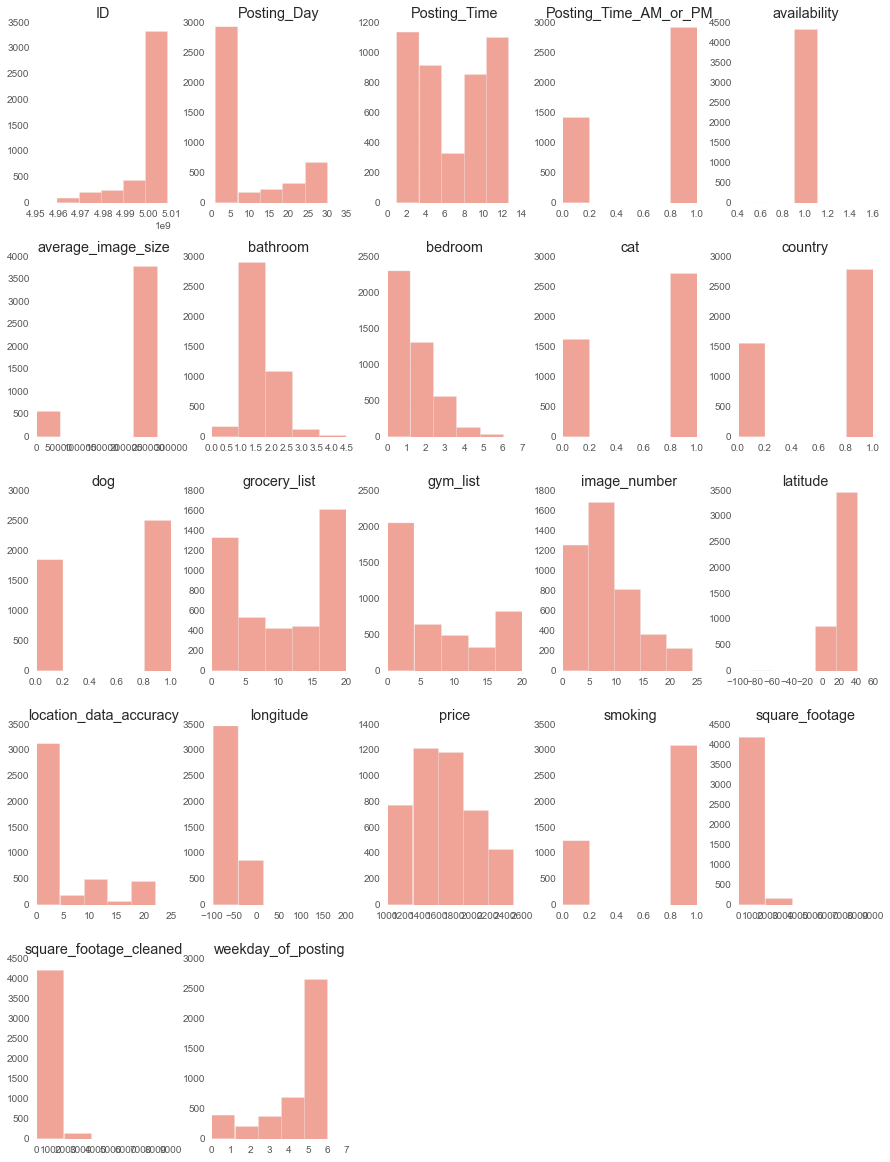

In [4]:
# Create a histogram to show the distribution in each variable

data.hist(alpha=0.5, bins=5, figsize=(15, 20))

In [5]:
# Create visualization plotting each field by price to determine which fields have instances with significant 
# differences in price

def visualize_all_fields_by_price(field):
    # Remove outliers for latitude and longitude
    if field == 'longitude':
        data[(data.longitude < -76.5) & (data.longitude > -78)].groupby('longitude')[['price']].mean().plot(figsize=(15, 2))
    elif field == 'latitude':
        data[(data.latitude > 38) & (data.latitude < 40)].groupby('latitude')[['price']].mean().plot(figsize=(15, 2))  
    
    # Avoid plotting price by price (itself) or ID
    elif field == 'price': pass 
    elif field == 'ID': pass 
    
    # Text descriptions do not have categories to visualize
    elif field == 'description': pass
    elif field == 'url': pass
    
    else:
        data.groupby(field)[['price']].mean().plot(figsize=(15, 2))

c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
c:\Users\alsherman\AppData\Local\Continuum\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


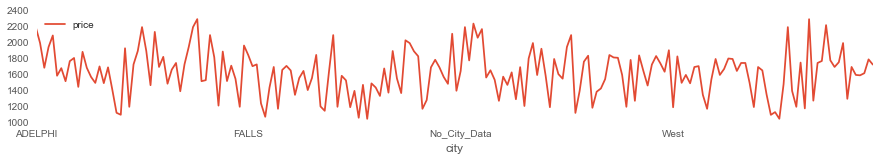

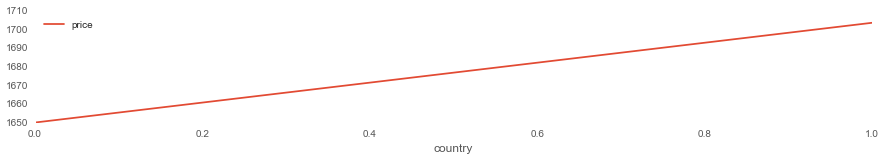

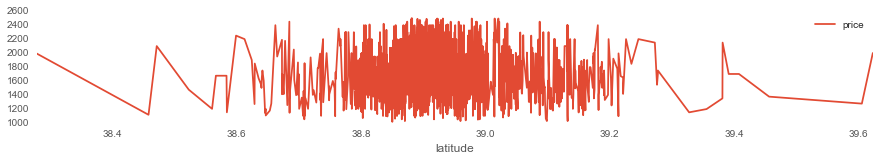

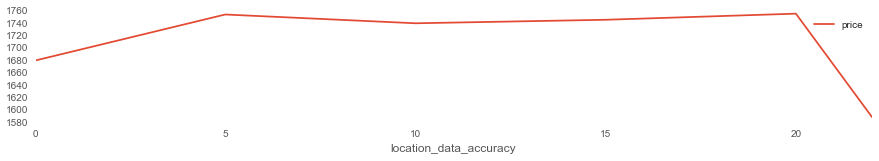

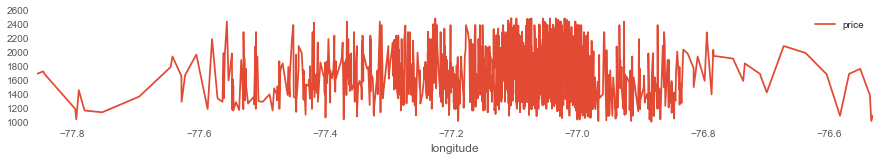

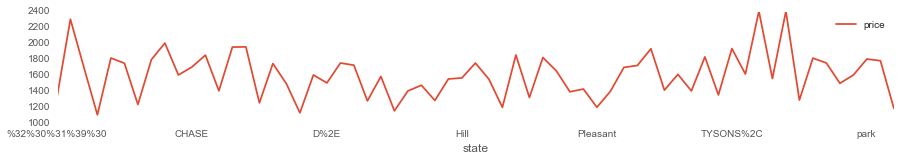

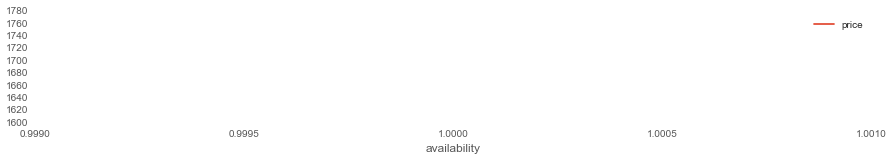

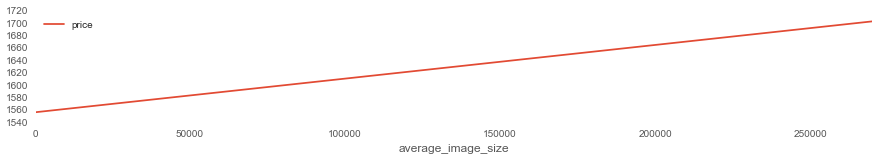

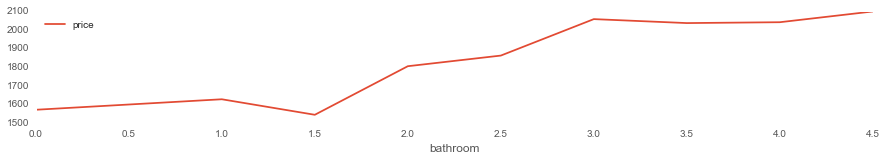

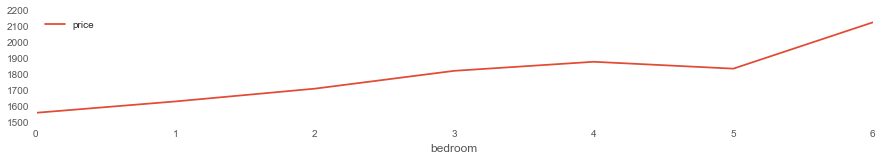

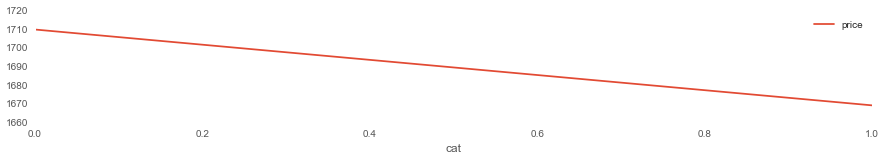

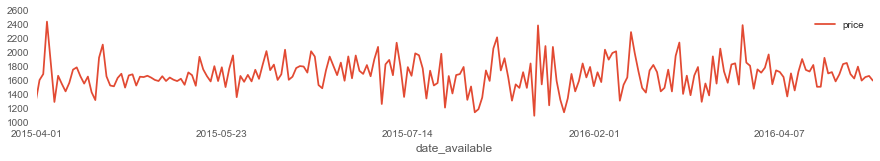

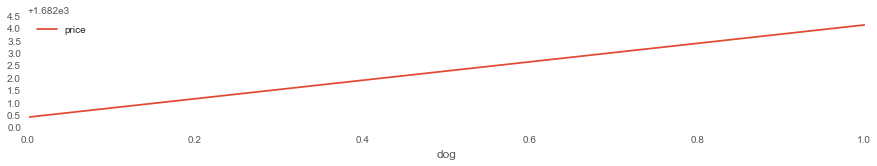

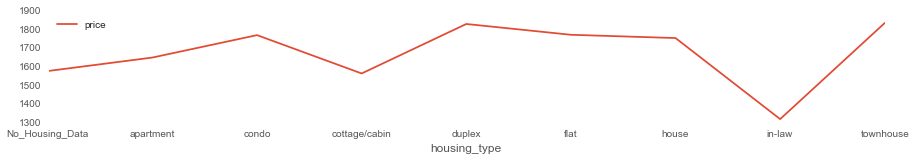

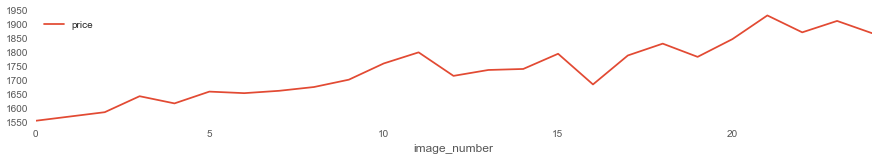

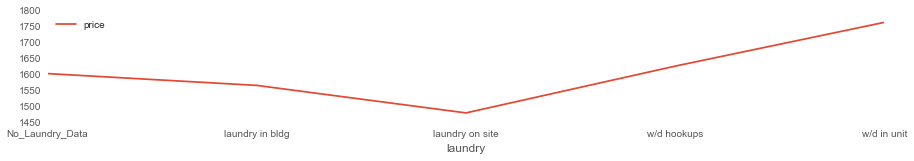

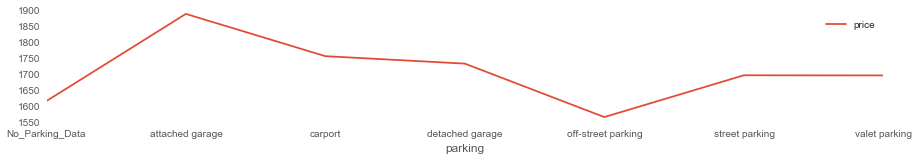

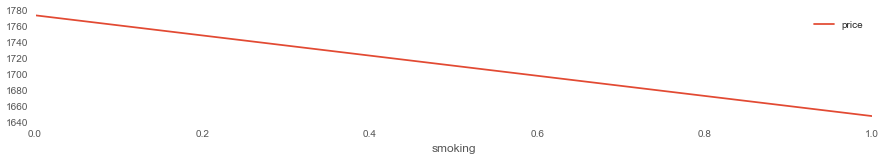

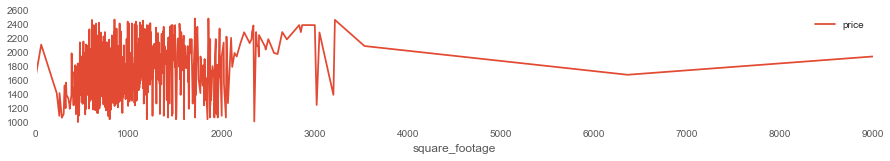

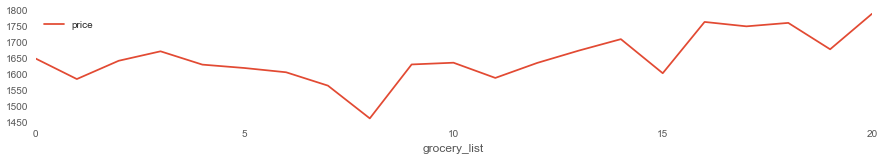

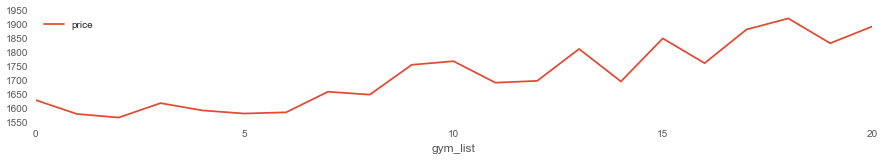

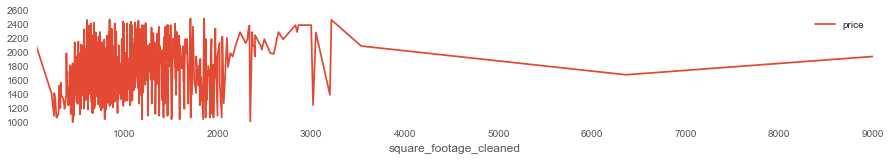

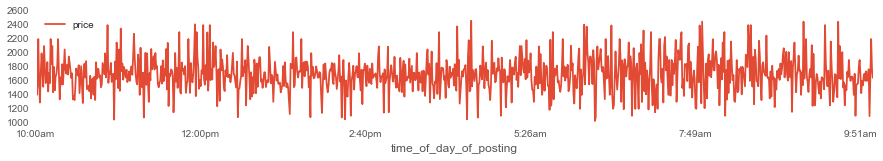

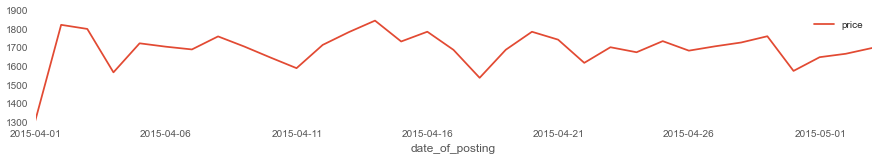

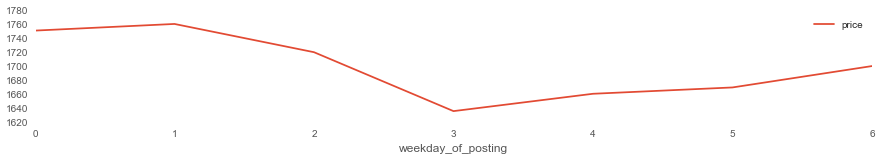

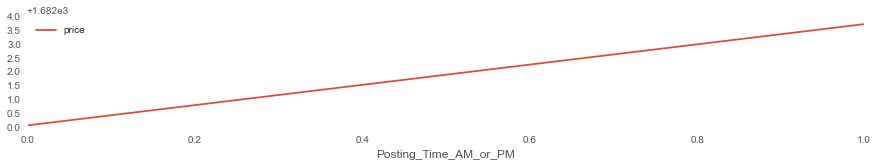

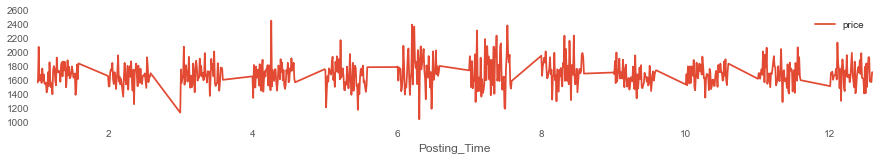

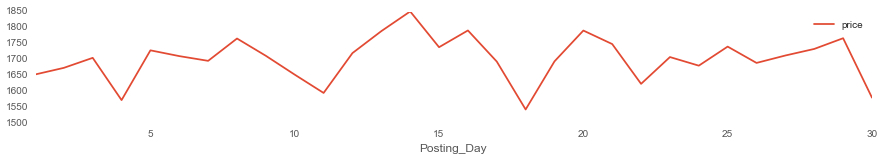

In [6]:
# View the visualizations from visualize_all_fields_by_price

for field in data.columns:
    visualize_all_fields_by_price(field)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000002044B320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C59A198>]], dtype=object)

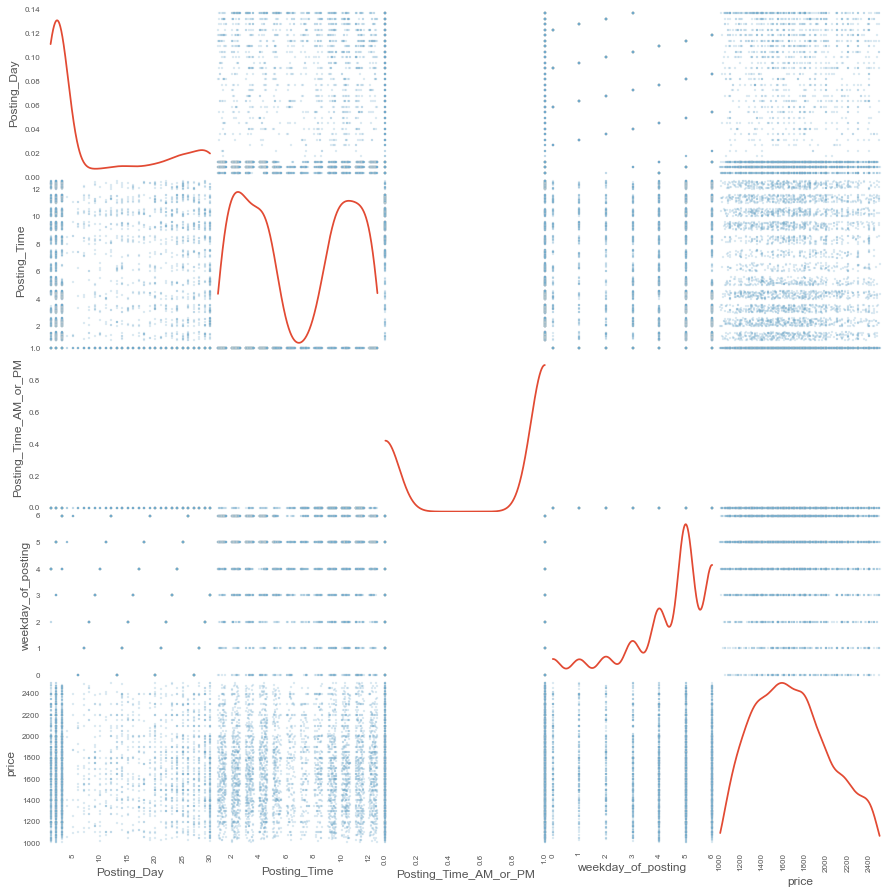

In [7]:
# Create a scatter matrix to view the correlation between Google Places API data for subways and train stations

scatter_matrix(data[['Posting_Day','Posting_Time','Posting_Time_AM_or_PM','weekday_of_posting','price']], alpha=0.2, figsize=(15, 15), diagonal='kde')